# BC2: Predict Hotel Booking Cancellations
**Problem type:** Classification

**Submission date:** 15-March-2021 | 11.59pm

In [1]:
from numpy import mean
from numpy import std
import numpy as np
import pandas as pd
from pandas import read_excel
import seaborn as sns
from math import ceil
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pandas import read_csv
from sklearn.metrics import mean_absolute_error
import scipy.stats as stats
import os
from pathlib import Path
from math import ceil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve
import graphviz
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

## Business Understanding:

### Assess Situation
The Hotel Chain C is a group of two hotels: H1 and H2.
Like every other chain, C deals with cancellations, which lead to a very significant impact in their number of bookings, and consequently, revenue from the booked hotel rooms.

In the table below we can see the number of bookings and consecutive revenue from each hotel that have and have not been canceled.

| Hotel | Metric       | Not Canceled        | Canceled            | Total              |
|-------|--------------|---------------------|---------------------|--------------------|
| H1    | Bookings     | 28,938 (72.2%)      | 11,122 (27.8%)      | 40,060 (100%)      |
| H1    | Room Revenue | 11,601,850€ (66.5%) | 5,842,177€ (33.5%)  | 17,444,028€ (100%) |
| H2    | Bookings     | 46,228 (58.3%)      | 33,102 (41.7%)      | 79,330 (100%)      |
| H2    | Room Revenue | 14,394,410€ (56.9%) | 10,885,060€ (43.1%) | 25,279,470€ (100%) |

Due to these high values the Revenue Manager Director of the hotel chain, Michael, added a limit to the number of rooms sold with restrictive policies, and consequently decided to have a more aggressive overbooking policy. This did not went as planned and the costs raised and Michael decided to take a step back and made the overbooking policy more soft, which also turned to not be the best decision.

In order to deal with the bad impact caused by cancellations, Michael decided to hire a consultant to evaluate the possibility of developing predictive models to predict the net demand for their hotels, specially in a city hotel, H2.
The hotel chain provided the consultant a dataset with the bookings from that hotel made from July 2015 until August 2017.

With these predictions, Michael wants to practice a better pricing and overbooking policies, as well as targeting the bookings that are most likely to be canceled. The main goal is for H2 to reduce cancelations to a rate of 20%.

The consultant has to take into considerations the problems of overbooking and a more restrictive cancelation policy. Overbooking creates the following problems:

- **Reallocation costs:** hotels must pay for the reallocation of customers in other hotels;
- **Social reputation damage:** customers sharing their unpleasant experience in social media, harm the hotel social reputation;
- **Loss of immediate and future revenue:** hotels lose not only the revenue of the reallocated customer current booking but also the possible future revenue of that customer, as probably, the customer will not want to book again at the hotel.

On the other side, restrictive cancelation policies, such as non-refundable rates, also create the problems below:

- **A decrease in revenue:** due to the discounts on prices;
- **A decrease in the number of bookings:** as most customers do not like these type of policies.

### Determine Machine Learning Goals
Create a Predictive Model to more accurately predict cancellations in order to know how much rooms the hotels should make available for booking.
With these the possibilities of overbooking and having more restrictive cancelation policies have to be taken into account. Is it better to risk overbooking, or a reputation of having strict policies? Which one is better for the reputation of the hotel and its revenues?

### Determine Business Objectives
The hotel chain wants to reach a cancelation rate for H2 of 20%, creating strategies for the clients that are predicted to cancel the booking to not cancel it.
A strategy has to be made in terms of the expected cancelations so we minimize the number of overbookings, having the best prediction possible to leave the least number of rooms empty.

### Produce Project Plan
1. Explore the data and build a model to predict cancellations:
    * Define a machine learning success criteria;
    * Take in consideration the business objectives and requirements when selecting the algorithm;
2. Elaborate on the business implications of employing the model and the insights obtained from model development
3. Make suggestions how could the model be deployed and its impact on the hotel’s business processes

[**TODO** - Elaborate the *Project plan* and the *Initial assessment techniques*]

## Data Understanding:

### Dataset description

#### Metadata

| Name                        | Meaning                                                                                                                                                                                                                                                          |
|-----------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ADR                         | Average Daily Rate                                                                                                                                                                                                                                               |
| Adults                      | Number of adults                                                                                                                                                                                                                                                 |
| Agent                       | ID of the travel agency that made the booking                                                                                                                                                                                                                    |
| ArrivalDateDayOfMonth       | Day of the month of the arrival date                                                                                                                                                                                                                             |
| ArrivalDateMonth            | Month of arrival date with 12 categories:  “January” to “December”                                                                                                                                                                                               |
| ArrivalDateWeekNumber       | Week number of the arrival date                                                                                                                                                                                                                                  |
| ArrivalDateYear             | Year of the arrival date                                                                                                                                                                                                                                         |
| AssignedRoomType            | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
| Babies                      | Number of babies                                                                                                                                                                                                                                                 |
| BookingChanges              | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation                                                                                                                 |
| Children                    | Number of children                                                                                                                                                                                                                                               |
| Company                     | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons                                                                                                               |
| Country                     | Country of origin. Categories are represented in the ISO 3155-3:2013 format                                                                                                                                                                                      |
| CustomerType                | Type of booking, assuming one of four possible categories (presented below)                                                                                                                                                                                      |
| DaysInWaitingList           | Number of days the booking was in the waiting list before it was confirmed to the customer                                                                                                                                                                       |
| DepositType                 | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories (presented)                                                                                                                                     |
| DistributionChannel         | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”                                                                                                                                                                |
| IsCanceled                  | Value indicating if the booking was canceled (1) or not (0)                                                                                                                                                                                                      |
| IsRepeatedGuest             | Value indicating if the booking name was from a repeated guest (1) or not (0)                                                                                                                                                                                    |
| LeadTime                    | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date                                                                                                                                                           |
| MarketSegment               | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”                                                                                                                                                   |
| Meal                        | Type of meal booked. Categories are presented in standard hospitality meal packages (presented below)                                                                                                                                                            |
| PreviousBookingsNotCanceled | Number of previous bookings not cancelled by the customer prior to the current booking                                                                                                                                                                           |
| PreviousCancellations       | Number of previous bookings that were cancelled by the customer prior to the current booking                                                                                                                                                                     |
| RequiredCarParkingSpaces    | Number of car parking spaces required by the customer                                                                                                                                                                                                            |
| ReservationStatus           | Reservation last status, assuming one of three categories (presented below)                                                                                                                                                                                      |
| ReservationStatusDate       | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel                                                         |
| ReservedRoomType            | Code of room type reserved. Code is presented instead of designation for anonymity reasons                                                                                                                                                                       |
| StaysInWeekendNights        | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel                                                                                                                                                                    |
| StaysInWeekNights           | Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel                                                                                                                                                                          |
| TotalOfSpecialRequests      | Number of special requests made by the customer (e.g. twin bed or high floor)                                                                                                                                                                                    |


**CustomerType** categories:
- Contract - when the booking has an allotment or other type of
- contract associated to it;
- Group – when the booking is associated to a group;
- Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
- Transient-party – when the booking is transient, but is associated to at least other transient booking

**DepositType** categories:
- No Deposit – no deposit was made;
- Non Refund – a deposit was made in the value of the total stay cost;
- Refundable – a deposit was made with a value under the total cost of stay.

**Meal** categories:
- Undefined/SC – no meal package;
- BB – Bed & Breakfast;
- HB – Half board (breakfast and one other meal – usually dinner);
- FB – Full board (breakfast, lunch and dinner)

**ReservationStatus** categories:
- Canceled – booking was canceled by the customer;
- Check-Out – customer has checked in but already departed;
- No-Show – customer did not check-in and did inform the hotel of the reason why
### Collect initial data

In [2]:
df = pd.read_csv('H2.csv')

### Describe, explore and assess data quality

In [3]:
df.head(10)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
5,1,79,2015,July,27,2,0,3,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-06-25
6,0,3,2015,July,27,2,0,3,1,0.0,...,No Deposit,1,NULL,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05
7,1,63,2015,July,27,2,1,3,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,0,Canceled,2015-06-25
8,1,62,2015,July,27,2,2,3,2,0.0,...,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02
9,1,62,2015,July,27,2,2,3,2,0.0,...,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02


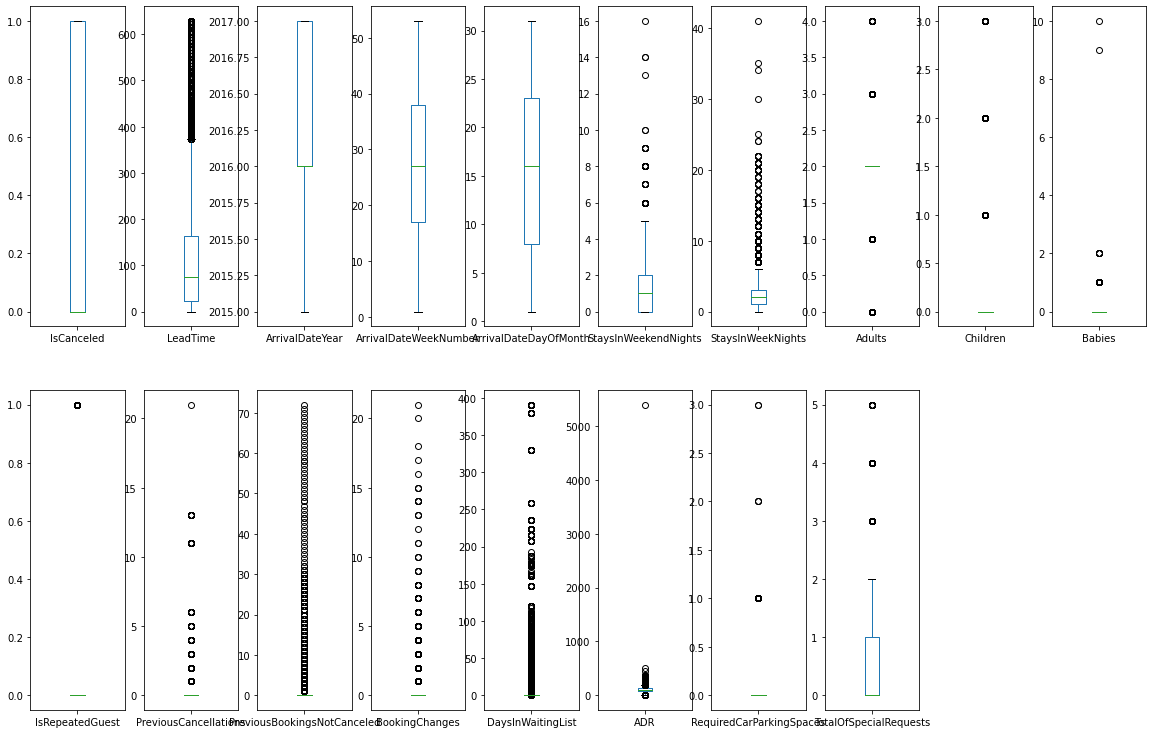

In [4]:
df.plot(kind='box', subplots=True, layout=(3,10), sharey=False, figsize=(20,20))
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

Apparently there are no null values in this DF, but we will soon find out this is not true

First and foremost, we have two columns which have missing values

In [3]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Children     4
Country     24
dtype: int64

In [4]:
metric = ['LeadTime','ArrivalDateYear',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies','ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests']
binary = ['IsCanceled','IsRepeatedGuest','PreviousCancellations',
         'PreviousBookingsNotCanceled','BookingChanges'] ###add DifferentRoom
other = ['Agent','ReservationStatusDate']          
OHE = ['Meal','MarketSegment','DistributionChannel','ReservedRoomType',
       'DepositType','ReservationStatus']
OHE_Flags = ['Meal_BB', 'Meal_FB', 'Meal_HB', 'Meal_SC',
       'MarketSegment_Aviation', 'MarketSegment_Complementary',
       'MarketSegment_Corporate', 'MarketSegment_Direct',
       'MarketSegment_Groups', 'MarketSegment_Offline TA/TO',
       'MarketSegment_Online TA', 'DistributionChannel_Corporate',
       'DistributionChannel_Direct', 'DistributionChannel_GDS',
       'DistributionChannel_TA/TO', 'ReservedRoomType_A',
       'ReservedRoomType_B', 'ReservedRoomType_C', 'ReservedRoomType_D',
       'ReservedRoomType_E', 'ReservedRoomType_F', 'ReservedRoomType_G',
       'ReservedRoomType_P']

In [8]:
# Reservation status and Deposit Type were removed because it was data leakage.

Creating a String Yes/No variable for visualization purposes

In [5]:
df

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,...,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0.0,...,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0.0,...,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0.0,...,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [6]:
pd.pivot_table(data=df, columns='IsCanceled', values='LeadTime')

IsCanceled,0,1
LeadTime,80.702734,150.281222


In [7]:
pd.pivot_table(data=df, columns='IsCanceled', values='TotalOfSpecialRequests')

IsCanceled,0,1
TotalOfSpecialRequests,0.741088,0.275754


In [8]:
pd.pivot_table(data=df, values='IsCanceled', columns='TotalOfSpecialRequests')

TotalOfSpecialRequests,0,1,2,3,4,5
IsCanceled,0.549242,0.220401,0.213584,0.176434,0.106061,0.038462


In [9]:
df['IsCanceledYN'] = df['IsCanceled'].apply(lambda x: 'No' if x == 0 else 'Yes')

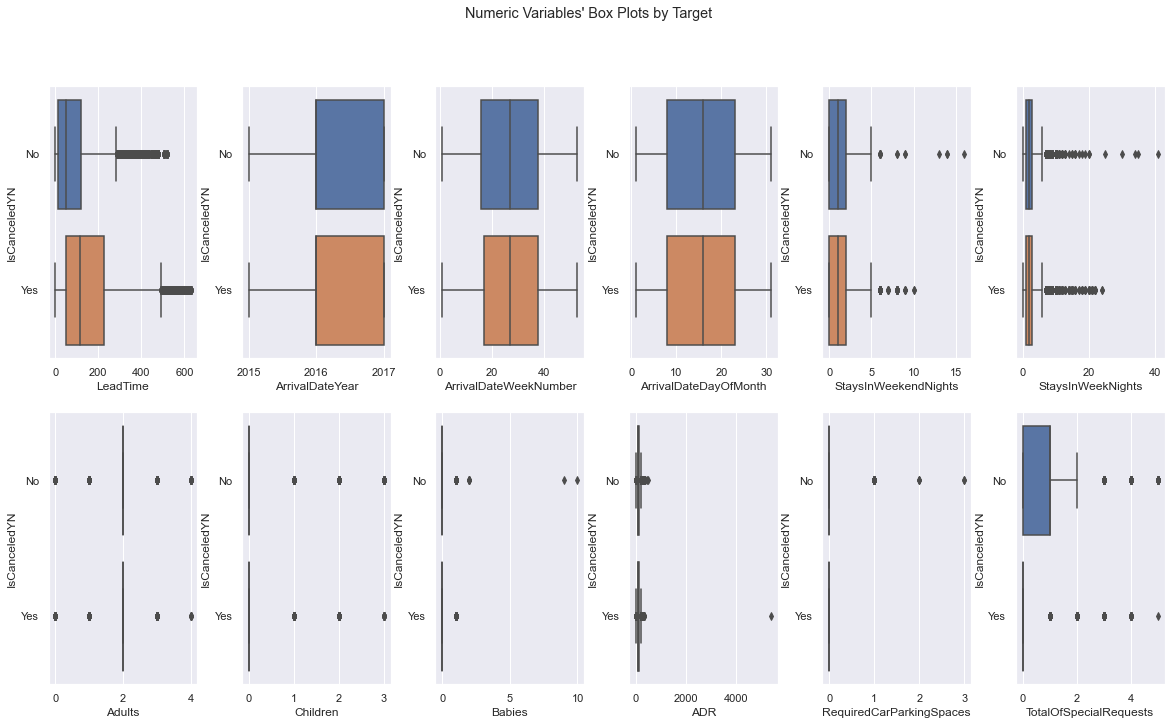

In [10]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric):
    sns.boxplot(x=df[feat], y=df['IsCanceledYN'], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots by Target"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.3)
plt.show()

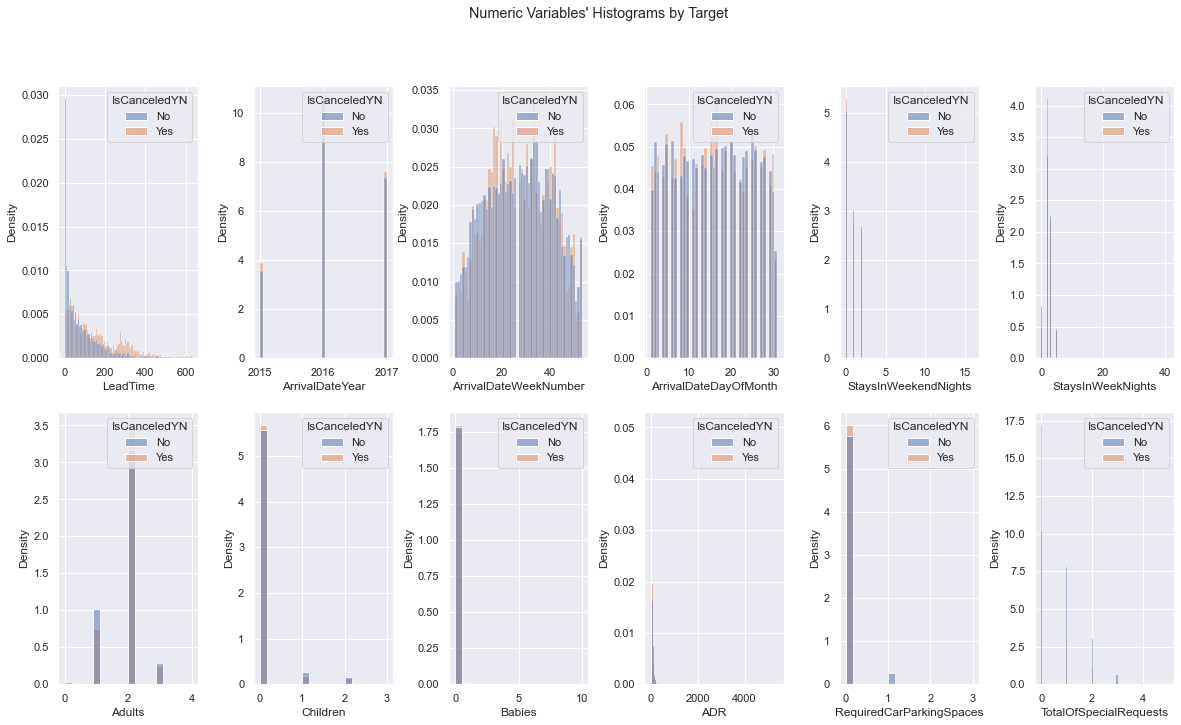

In [11]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric):
    sns.histplot(x=df[feat], hue=df['IsCanceledYN'], stat='density', common_norm=False, ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms by Target"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.4)
plt.show()

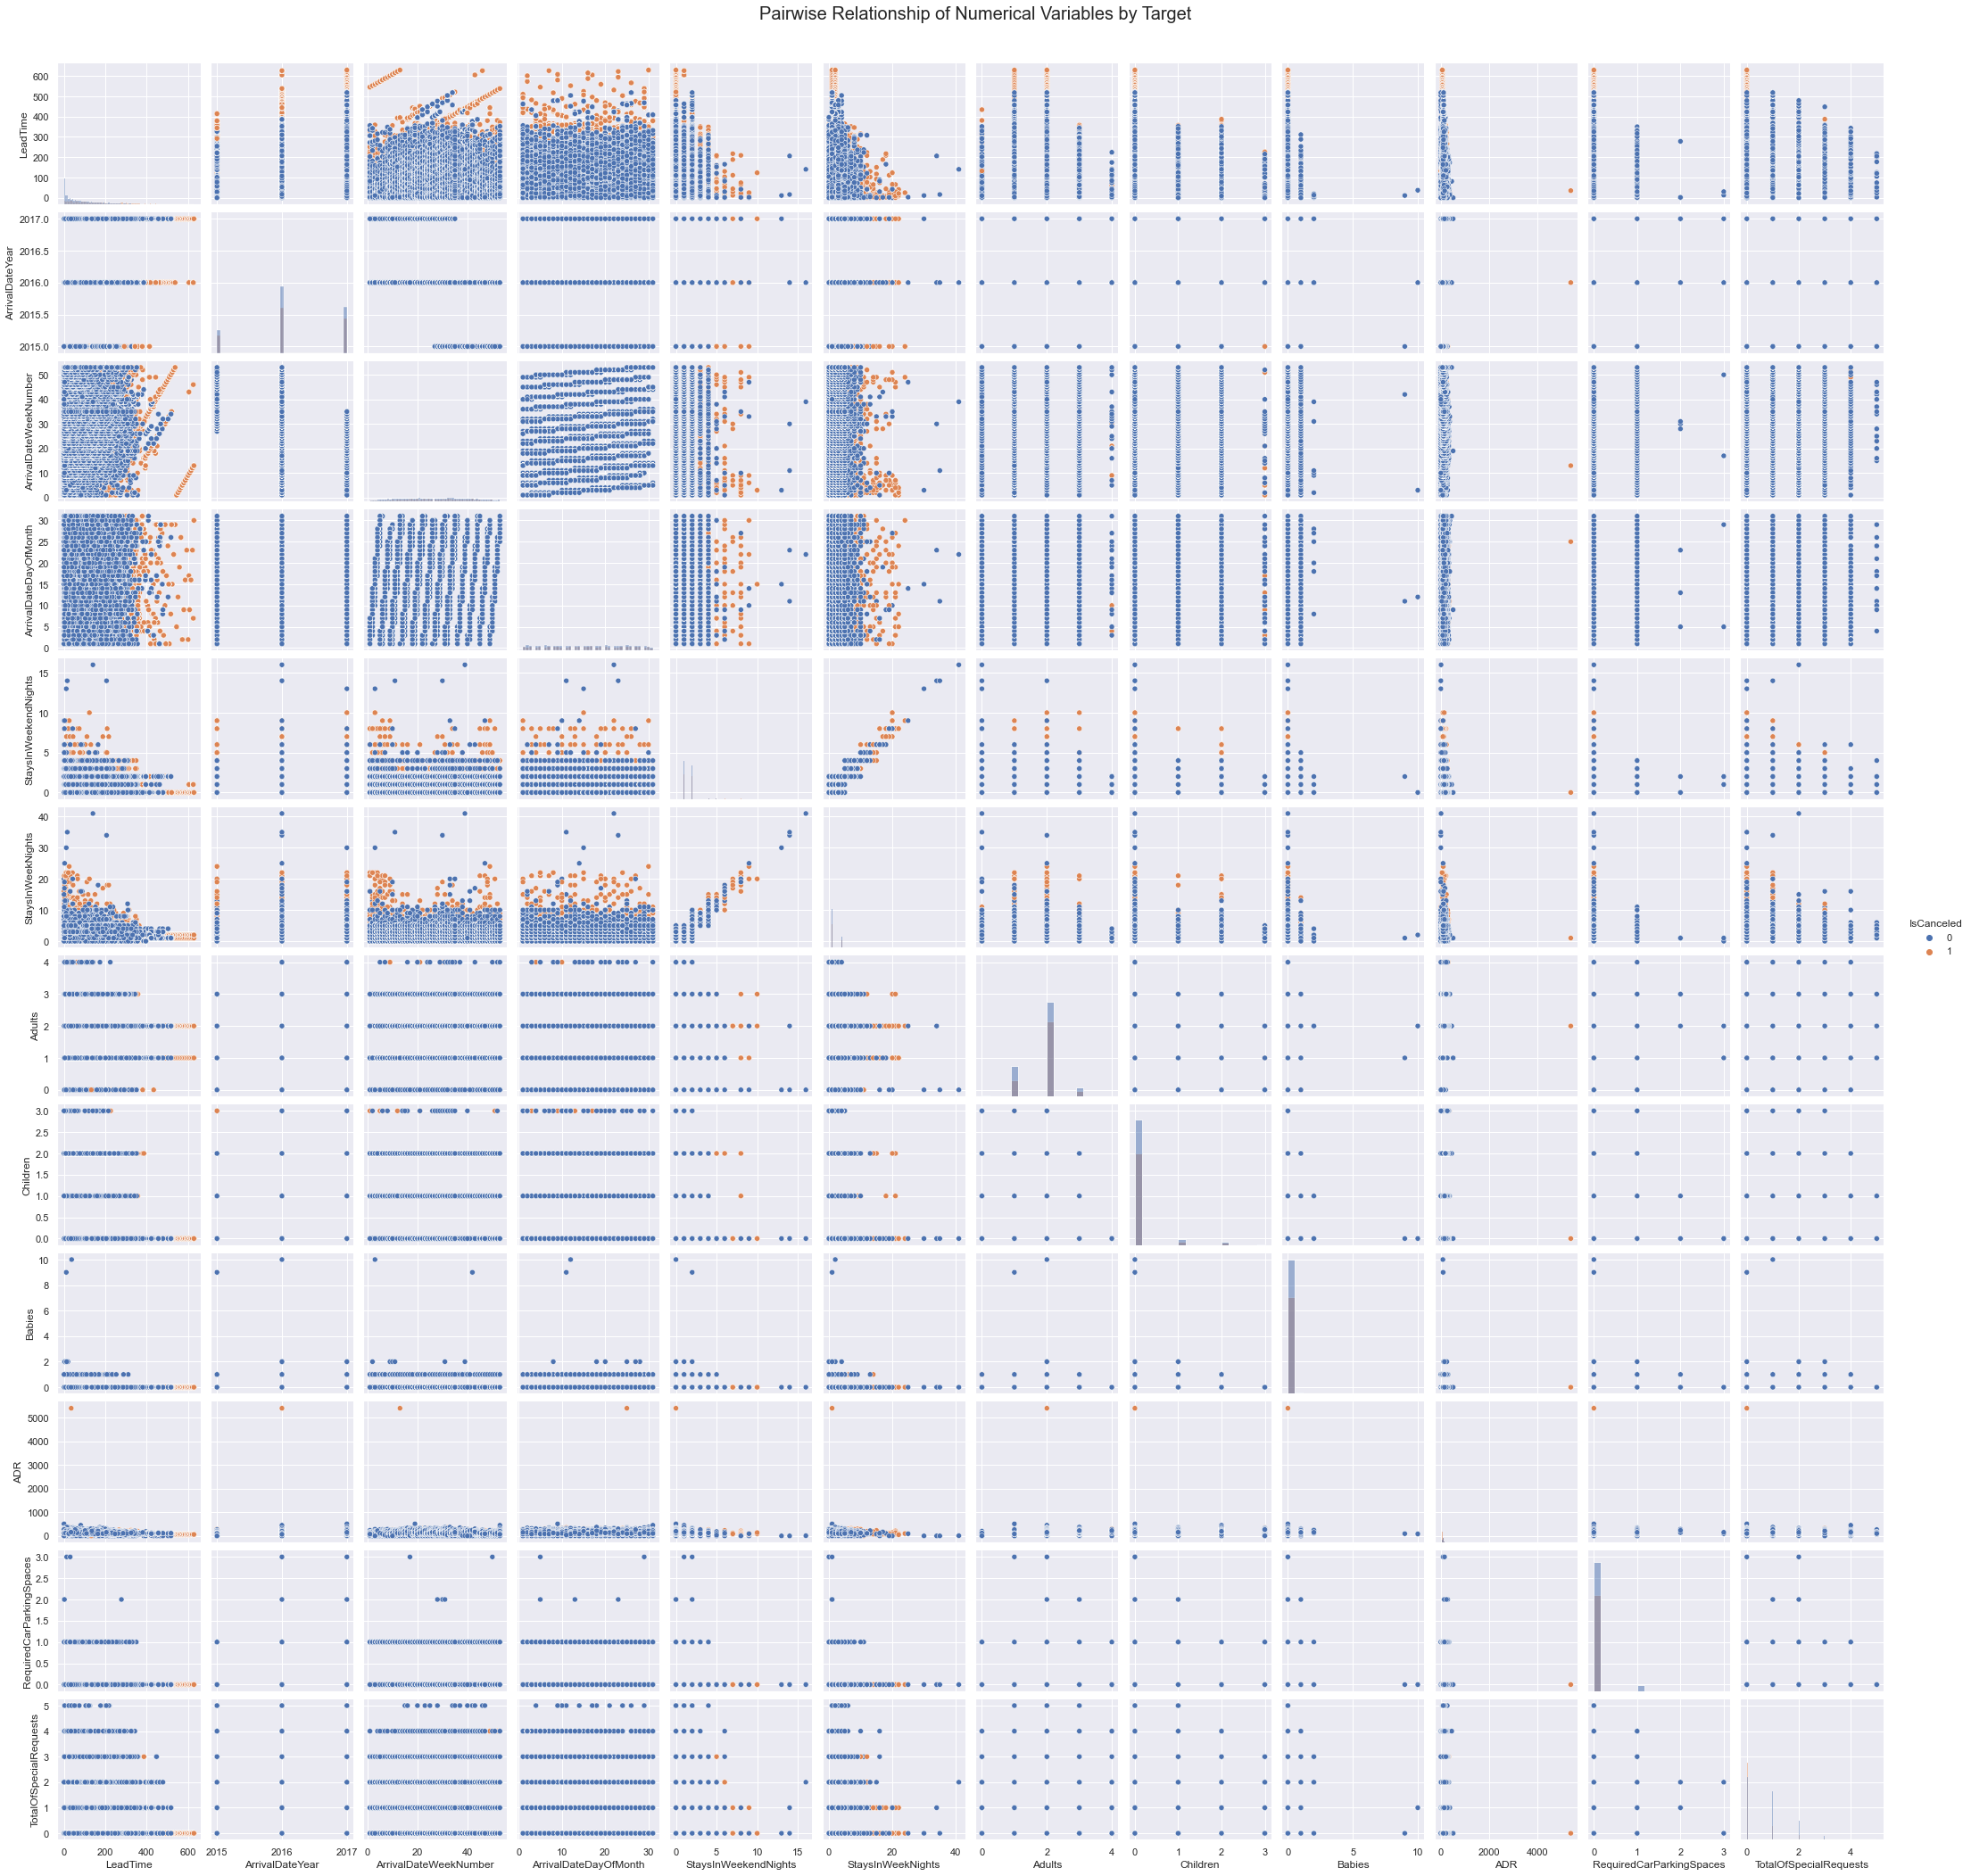

In [12]:
# Pairwise Relationship of Numerical Variables
sns.set()
features = metric + ['IsCanceled']

# Setting pairplot
sns.pairplot(data=df[features], hue='IsCanceled', diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables by Target", fontsize=20)

plt.show()

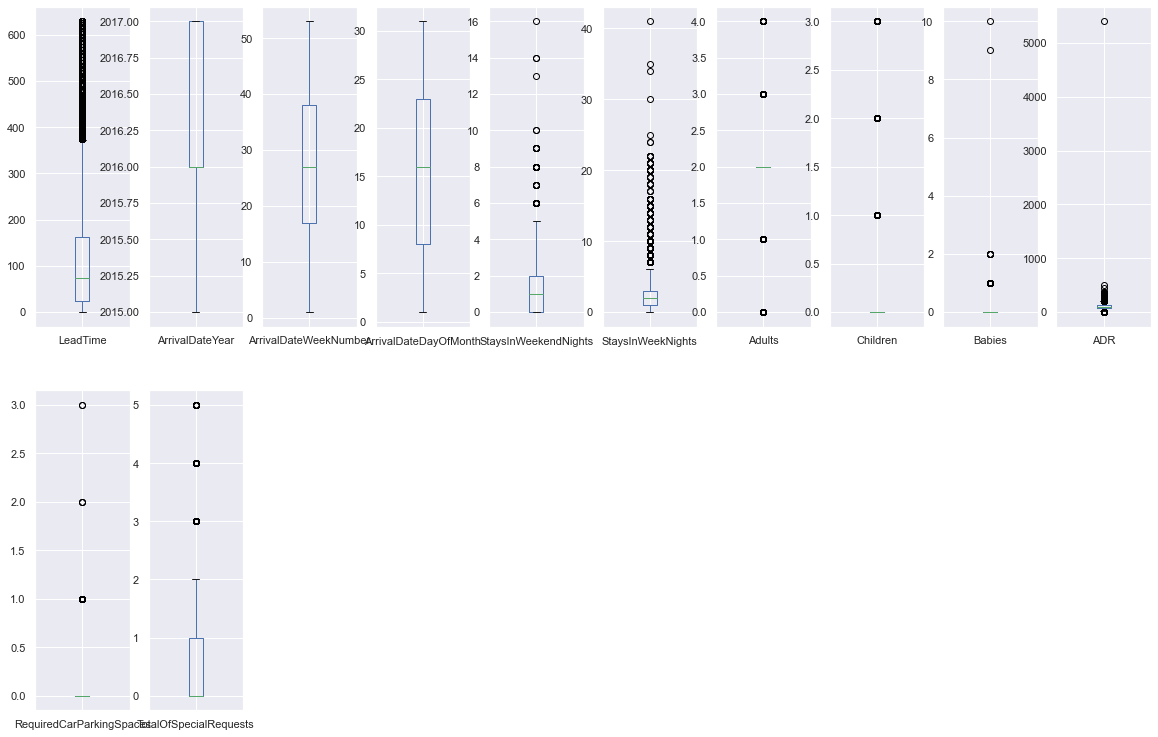

In [13]:
df[metric].plot(kind='box', subplots=True, layout=(3,10), sharey=False, figsize=(20,20))
plt.show()

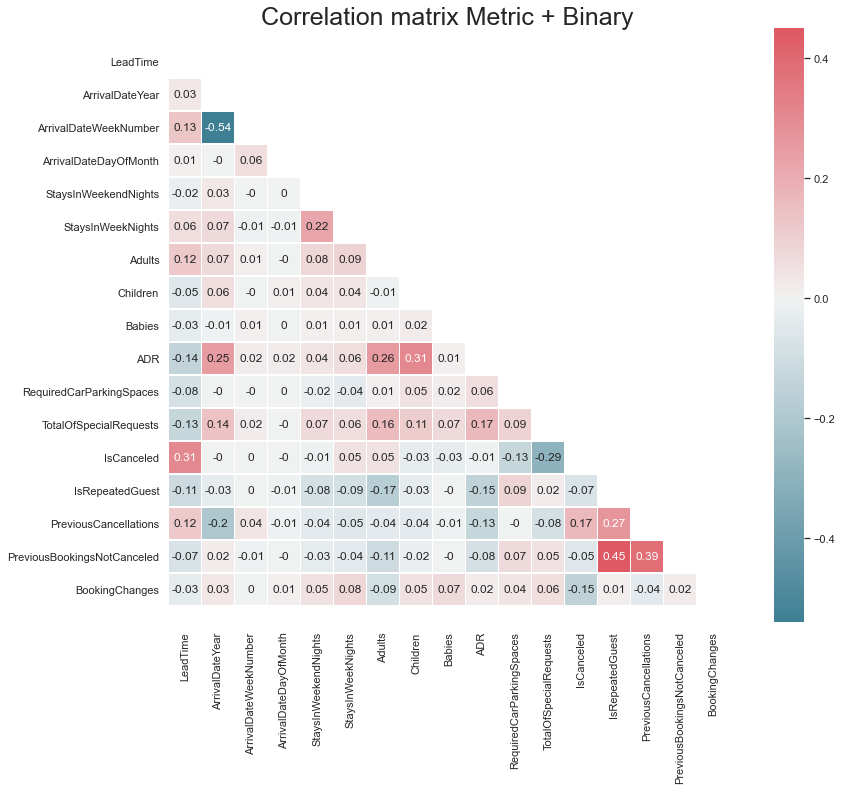

In [14]:
sns.set(style="white")

# Compute the correlation matrix
corr = round(df[metric+binary].corr(),2) # Getting correlation of numerical variables

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool) # Return an array of zeros (Falses) with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True # The upper-triangle array is now composed by True values

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True) # Make a diverging palette between two HUSL colors. Return a matplotlib colormap object.

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square= True, linewidths=.5, ax=ax, annot=True)

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Correlation matrix Metric + Binary", fontsize=25)
plt.yticks(rotation=0)

# Fixing the bug of partially cut-off bottom and top cells
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

## Data Preparation:

### Clean data
#### Dealing with outliers

'Babies' has 2 values with an absurd quantity, which we deem it´s an error so we will remove those outliers and cap it at 2

In [10]:
df['Babies'] = np.where(df['Babies'] > 2, 2, df['Babies'])

In [11]:
print(df.PreviousCancellations.value_counts())

0     73941
1      5155
2        72
3        51
11       35
4        25
6        22
5        16
13       12
21        1
Name: PreviousCancellations, dtype: int64


'PreviousCancellations' has 1 value that we deem it´s an outlier, so we will cap it at 13

In [12]:
df['PreviousCancellations'] = np.where(df['PreviousCancellations'] > 13, 13, df['PreviousCancellations'])

Need to remove outlier from ADR, so we will cap it at 510 (there is only one value above that: 5400, probably a typo)

In [13]:
df['ADR'] = np.where(df['ADR'] > 510, 510, df['ADR'])

In [14]:
print(df.BookingChanges.value_counts())

0     69062
1      7232
2      2244
3       467
4       194
5        46
6        31
7        19
8         9
14        5
9         4
10        3
13        3
15        3
11        2
20        1
12        1
16        1
17        1
18        1
21        1
Name: BookingChanges, dtype: int64


Need to remove outliers, so we will cap it at 10 changes

In [15]:
df['BookingChanges'] = np.where(df['BookingChanges'] > 10, 10, df['BookingChanges'])

### Encoding features

The dates of arrival were in string and for a better analysis we will encode them to integers

In [16]:
df.ArrivalDateMonth.replace({'January': 1, 
                             'February': 2,
                             'March': 3,
                             'April':4,
                             'May':5,
                             'June':6,
                             'July':7,
                             'August':8,
                             'September':9,
                             'October':10,
                             'November':11,
                             'December':12}, inplace=True)

On Children, only 4 are nans so we will replace them with 0. Also we will make the values as integers

In [17]:
df.Children = df.Children.replace(np.nan, 0, regex=True)
df.Children = np.int64(df.Children)
df.Children.unique()

array([0, 1, 2, 3], dtype=int64)

In [18]:
# convert to datetime
df.ReservationStatusDate = pd.to_datetime(df['ReservationStatusDate'])

### Data Preparation
Removing unnecessary spaces from some variables

In [19]:
df['Meal'] = df['Meal'].str.strip()
df['Agent'] = df['Agent'].str.strip()
df['Company'] = df['Company'].str.strip()
df['ReservedRoomType'] = df['ReservedRoomType'].str.strip()
df['AssignedRoomType'] = df['AssignedRoomType'].str.strip()
df['DepositType'] = df['DepositType'].str.strip()

In [20]:
df.Country.unique()

array(['PRT', 'ITA', 'ESP', 'DEU', 'FRA', 'NLD', 'GBR', 'ROU', 'BRA',
       'SWE', 'AUT', 'AGO', 'BEL', 'CHE', 'NOR', 'RUS', 'ISR', 'IRL',
       'POL', 'CHN', 'USA', 'MAR', 'AUS', 'MOZ', 'TUN', 'DNK', 'MEX',
       'GRC', 'DZA', 'COL', 'LUX', 'CN', 'LVA', 'FIN', 'HRV', 'STP',
       'BGR', 'UKR', 'VEN', 'TWN', 'IRN', 'KOR', 'TUR', 'BLR', 'JPN',
       'CZE', 'HUN', 'AZE', 'KAZ', 'IND', 'NZL', 'IDN', 'LTU', 'LBN',
       'SRB', 'SVN', 'SVK', 'MYS', 'CMR', 'CHL', 'ARG', nan, 'SGP', 'SEN',
       'PER', 'EGY', 'SAU', 'KNA', 'JOR', 'ZAF', 'THA', 'KWT', 'LKA',
       'ALB', 'ETH', 'PHL', 'ARE', 'ECU', 'OMN', 'IRQ', 'AND', 'CPV',
       'MUS', 'HND', 'NGA', 'RWA', 'EST', 'PAK', 'GEO', 'GIB', 'ZMB',
       'QAT', 'KHM', 'HKG', 'MCO', 'BGD', 'ISL', 'UZB', 'URY', 'IMN',
       'TJK', 'ARM', 'MDV', 'NIC', 'GGY', 'BEN', 'MAC', 'CYP', 'VGB',
       'MLT', 'CRI', 'TZA', 'JEY', 'GAB', 'MKD', 'BIH', 'VNM', 'GHA',
       'TMP', 'GLP', 'KEN', 'PRI', 'DOM', 'LIE', 'GNB', 'BHR', 'MNE',
       'UMI', 'M

We have entries with ISO A2 standard when all the other have ISO A3 (3 letters for country code).

It´s CN, which is China in ISO A2 and CHN in ISO A3 so we will change that

In [21]:
df.Country = df.Country.replace('CH', "CHN", regex=True)
print ("Percentage of 'Country' that is NaN:", df.Country.isnull().sum() * 100 / len(df.Country))

Percentage of 'Country' that is NaN: 0.030253371990419765


Setting Undefined as Nans

In [22]:
print(df.MarketSegment.value_counts())
df.MarketSegment = df.MarketSegment.replace('Undefined', np.nan, regex=True)

Online TA        38748
Offline TA/TO    16747
Groups           13975
Direct            6093
Corporate         2986
Complementary      542
Aviation           237
Undefined            2
Name: MarketSegment, dtype: int64


Replacing the string "NULL" with NA

In [23]:
df.Company = df.Company.replace('NULL', 'NA', regex=True)
print (df.Company.describe())
# Company should remain a string because it´s just an ID

count     79330
unique      208
top          NA
freq      75641
Name: Company, dtype: object


In [24]:
# We will set Undefined as Nans
print(df.DistributionChannel.value_counts())
df.DistributionChannel = df.DistributionChannel.replace('Undefined', np.nan, regex=True)

TA/TO        68945
Direct        6780
Corporate     3408
GDS            193
Undefined        4
Name: DistributionChannel, dtype: int64


### Missing Values

In [25]:
# Final DF with percentage of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
IsCanceled,IsCanceled,0.000000
TotalOfSpecialRequests,TotalOfSpecialRequests,0.000000
RequiredCarParkingSpaces,RequiredCarParkingSpaces,0.000000
ADR,ADR,0.000000
CustomerType,CustomerType,0.000000
DaysInWaitingList,DaysInWaitingList,0.000000
Company,Company,0.000000
Agent,Agent,0.000000
DepositType,DepositType,0.000000
BookingChanges,BookingChanges,0.000000


In [26]:
# Number of missing values
print(df.isna().sum())

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        0
Babies                          0
Meal                            0
Country                        24
MarketSegment                   2
DistributionChannel             4
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

Since the number of missing values is really low (0.0003%), we will drop them

In [27]:
df.dropna(axis=0, inplace=True)

### Construct data

In [28]:
df.ReservedRoomType.value_counts()

A    62579
D    11768
F     1791
E     1553
B     1111
G      484
C       14
P        2
Name: ReservedRoomType, dtype: int64

In [29]:
df.AssignedRoomType.value_counts()

A    56991
D    14983
E     2168
F     2018
B     2000
G      700
K      279
C      161
P        2
Name: AssignedRoomType, dtype: int64

In [30]:
# FEATURE ENGINEERING: create a new feature with 0 if the room didn´t change, and 1 if it did
Different_Room = np.where(df["AssignedRoomType"] == df["ReservedRoomType"], 0, 1)
df['Different_Room'] = Different_Room
df['Different_Room'].value_counts()

0    72110
1     7192
Name: Different_Room, dtype: int64

In [31]:
binary.append('Different_Room')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79302 entries, 0 to 79329
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   IsCanceled                   79302 non-null  int64         
 1   LeadTime                     79302 non-null  int64         
 2   ArrivalDateYear              79302 non-null  int64         
 3   ArrivalDateMonth             79302 non-null  int64         
 4   ArrivalDateWeekNumber        79302 non-null  int64         
 5   ArrivalDateDayOfMonth        79302 non-null  int64         
 6   StaysInWeekendNights         79302 non-null  int64         
 7   StaysInWeekNights            79302 non-null  int64         
 8   Adults                       79302 non-null  int64         
 9   Children                     79302 non-null  int64         
 10  Babies                       79302 non-null  int64         
 11  Meal                         79302 non-nu

In [33]:
df[OHE]

,Meal,MarketSegment,DistributionChannel,ReservedRoomType,DepositType,ReservationStatus
0,HB,Offline TA/TO,TA/TO,A,No Deposit,Check-Out
1,BB,Online TA,TA/TO,A,No Deposit,Canceled
2,BB,Online TA,TA/TO,A,No Deposit,Canceled
3,BB,Online TA,TA/TO,A,No Deposit,Canceled
4,BB,Online TA,TA/TO,A,No Deposit,Canceled
...,...,...,...,...,...,...
79325,BB,Offline TA/TO,TA/TO,A,No Deposit,Check-Out
79326,BB,Online TA,TA/TO,E,No Deposit,Check-Out
79327,BB,Online TA,TA/TO,D,No Deposit,Check-Out
79328,BB,Online TA,TA/TO,A,No Deposit,Check-Out


In [34]:
enc = OneHotEncoder(handle_unknown='ignore')
X = df[OHE]
enc.fit(X)
OHE_features = enc.get_feature_names(df[OHE].columns)
OHE_transformed = enc.transform(df[OHE])
enc.categories_

[array(['BB', 'FB', 'HB', 'SC'], dtype=object),
 array(['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups',
        'Offline TA/TO', 'Online TA'], dtype=object),
 array(['Corporate', 'Direct', 'GDS', 'TA/TO'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'P'], dtype=object),
 array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object),
 array(['Canceled', 'Check-Out', 'No-Show'], dtype=object)]

In [35]:
one_hot_encoded =  pd.DataFrame(OHE_transformed.todense(), columns= OHE_features)
one_hot_encoded

,Meal_BB,Meal_FB,Meal_HB,Meal_SC,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Offline TA/TO,...,ReservedRoomType_E,ReservedRoomType_F,ReservedRoomType_G,ReservedRoomType_P,DepositType_No Deposit,DepositType_Non Refund,DepositType_Refundable,ReservationStatus_Canceled,ReservationStatus_Check-Out,ReservationStatus_No-Show
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79297,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
79298,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
79299,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
79300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


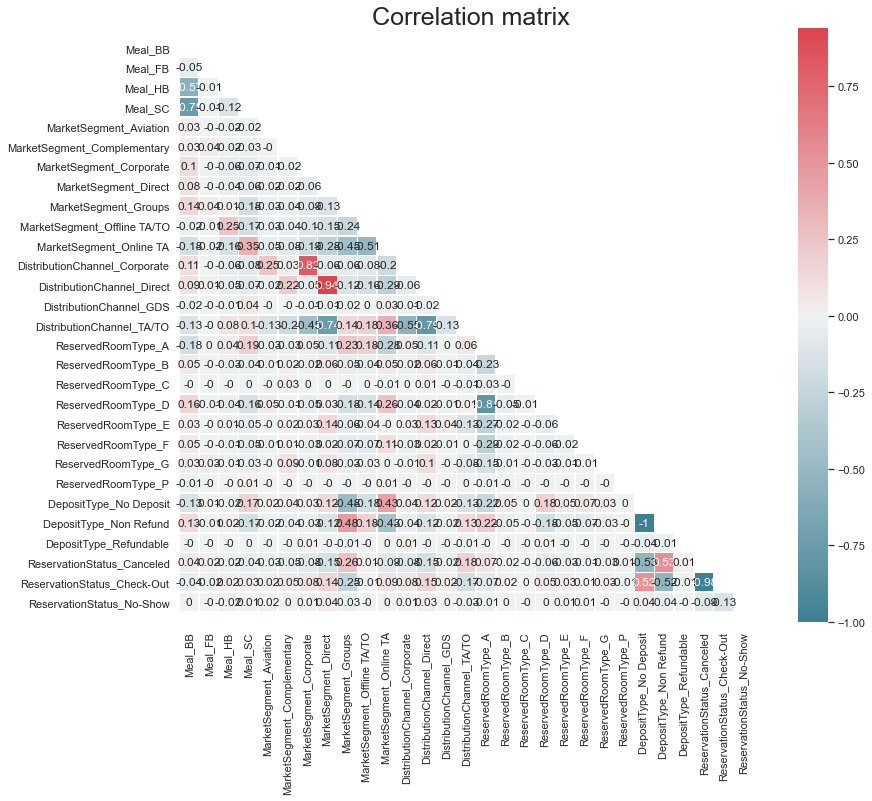

In [36]:
sns.set(style="white")

# Compute the correlation matrix
corr = round(one_hot_encoded.corr(),2) # Getting correlation of numerical variables

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool) # Return an array of zeros (Falses) with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True # The upper-triangle array is now composed by True values

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True) # Make a diverging palette between two HUSL colors. Return a matplotlib colormap object.

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square= True, linewidths=.5, ax=ax, annot=True)

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Correlation matrix", fontsize=25)
plt.yticks(rotation=0)

# Fixing the bug of partially cut-off bottom and top cells
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

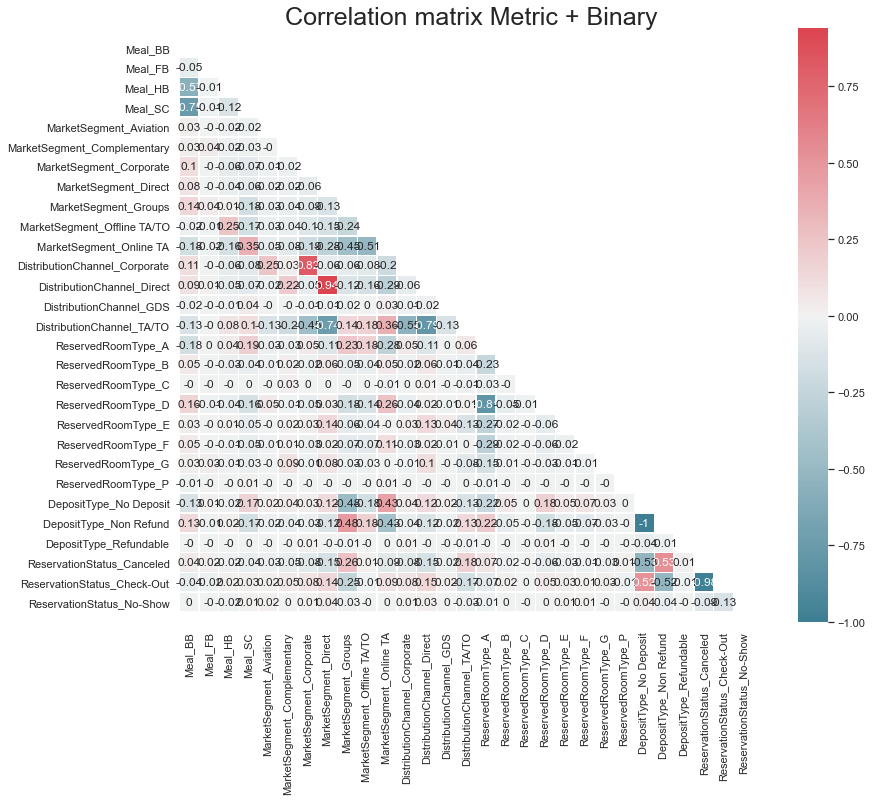

In [37]:

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool) # Return an array of zeros (Falses) with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True # The upper-triangle array is now composed by True values

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True) # Make a diverging palette between two HUSL colors. Return a matplotlib colormap object.

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square= True, linewidths=.5, ax=ax, annot=True)

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Correlation matrix Metric + Binary", fontsize=25)
plt.yticks(rotation=0)

# Fixing the bug of partially cut-off bottom and top cells
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

# ARRIVAL DATE MONTH WAS REMOVED DUE TO MULTICOLLINEARITY

In [38]:
final = pd.concat([df, one_hot_encoded], axis=1, join='inner')
final.reset_index (drop=True, inplace=True)
final

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ReservedRoomType_E,ReservedRoomType_F,ReservedRoomType_G,ReservedRoomType_P,DepositType_No Deposit,DepositType_Non Refund,DepositType_Refundable,ReservationStatus_Canceled,ReservationStatus_Check-Out,ReservationStatus_No-Show
0,0,6,2015,7,27,1,0,2,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,88,2015,7,27,1,0,4,2,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,65,2015,7,27,1,0,4,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,92,2015,7,27,1,2,4,2,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,100,2015,7,27,2,0,2,2,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79269,0,47,2017,8,35,31,1,3,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
79270,0,135,2017,8,35,30,1,4,2,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
79271,0,63,2017,8,35,31,1,3,2,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
79272,0,195,2017,8,35,29,1,5,2,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [39]:
len(df)-(len(final))

28

## Modeling:

### Generate test design

In [40]:
# List of selected features to be used on the predictive model
selected_features = metric+binary+OHE_Flags
selected_features

['LeadTime',
 'ArrivalDateYear',
 'ArrivalDateWeekNumber',
 'ArrivalDateDayOfMonth',
 'StaysInWeekendNights',
 'StaysInWeekNights',
 'Adults',
 'Children',
 'Babies',
 'ADR',
 'RequiredCarParkingSpaces',
 'TotalOfSpecialRequests',
 'IsCanceled',
 'IsRepeatedGuest',
 'PreviousCancellations',
 'PreviousBookingsNotCanceled',
 'BookingChanges',
 'Different_Room',
 'Meal_BB',
 'Meal_FB',
 'Meal_HB',
 'Meal_SC',
 'MarketSegment_Aviation',
 'MarketSegment_Complementary',
 'MarketSegment_Corporate',
 'MarketSegment_Direct',
 'MarketSegment_Groups',
 'MarketSegment_Offline TA/TO',
 'MarketSegment_Online TA',
 'DistributionChannel_Corporate',
 'DistributionChannel_Direct',
 'DistributionChannel_GDS',
 'DistributionChannel_TA/TO',
 'ReservedRoomType_A',
 'ReservedRoomType_B',
 'ReservedRoomType_C',
 'ReservedRoomType_D',
 'ReservedRoomType_E',
 'ReservedRoomType_F',
 'ReservedRoomType_G',
 'ReservedRoomType_P']

In [41]:
final[selected_features+['IsCanceled']].corr()

,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,ADR,...,DistributionChannel_TA/TO,ReservedRoomType_A,ReservedRoomType_B,ReservedRoomType_C,ReservedRoomType_D,ReservedRoomType_E,ReservedRoomType_F,ReservedRoomType_G,ReservedRoomType_P,IsCanceled
LeadTime,1.000000,0.027882,0.130317,0.014171,-0.023925,0.058061,0.115520,-0.053539,-0.034364,-0.151297,...,0.101536,0.027174,-0.022702,-0.003971,-0.018419,-0.006398,-0.005079,-0.002374,0.002027,0.309555
ArrivalDateYear,0.027882,1.000000,-0.543292,-0.003649,0.034301,0.065954,0.067858,0.055605,-0.007627,0.275776,...,0.013812,-0.128958,-0.031715,-0.008746,0.114498,0.072193,0.023552,0.028418,0.005934,-0.002280
ArrivalDateWeekNumber,0.130317,-0.543292,1.000000,0.061470,-0.001136,-0.009117,0.007001,-0.001100,0.007781,0.020989,...,0.009535,0.029593,0.004046,0.013433,-0.028084,-0.026991,0.007223,-0.001084,0.001810,0.001490
ArrivalDateDayOfMonth,0.014171,-0.003649,0.061470,1.000000,-0.000292,-0.012704,-0.001686,0.012950,0.001766,0.024310,...,0.007286,-0.017273,0.005154,0.002071,0.012870,0.003944,0.008334,0.000892,-0.003328,-0.003684
StaysInWeekendNights,-0.023925,0.034301,-0.001136,-0.000292,1.000000,0.218952,0.082100,0.037580,0.007359,0.041960,...,-0.009829,-0.014400,-0.000401,0.000933,0.012494,0.000132,0.010462,-0.001062,-0.004513,-0.006827
StaysInWeekNights,0.058061,0.065954,-0.009117,-0.012704,0.218952,1.000000,0.088001,0.037295,0.007815,0.064176,...,0.024481,-0.018648,0.000566,0.002903,0.012753,0.007766,0.010489,0.004101,0.002822,0.049171
Adults,0.115520,0.067858,0.007001,-0.001686,0.082100,0.088001,1.000000,-0.005903,0.016278,0.290187,...,0.041128,-0.037974,-0.000539,-0.001707,0.034872,0.002193,0.016128,0.005750,0.006403,0.053499
Children,-0.053539,0.055605,-0.001100,0.012950,0.037580,0.037295,-0.005903,1.000000,0.029196,0.346099,...,-0.007213,-0.036303,0.017416,0.001836,0.024412,0.005381,0.017842,0.008590,-0.001234,-0.027083
Babies,-0.034364,-0.007627,0.007781,0.001766,0.007359,0.007815,0.016278,0.029196,1.000000,0.019401,...,-0.015805,-0.002410,-0.001961,-0.000900,0.001536,-0.001795,-0.000625,0.013135,-0.000340,-0.033976
ADR,-0.151297,0.275776,0.020989,0.024310,0.041960,0.064176,0.290187,0.346099,0.019401,1.000000,...,0.014181,-0.076776,-0.013320,0.001536,0.067610,0.028622,0.024044,0.016254,0.004951,-0.014356


In [42]:
selected_features=['LeadTime',
 'ArrivalDateYear',
 'ArrivalDateWeekNumber',
 'ArrivalDateDayOfMonth',
 'StaysInWeekendNights',
 'StaysInWeekNights',
 'Adults',
 'Children',
 'Babies',
 'ADR',
 'RequiredCarParkingSpaces',
 'TotalOfSpecialRequests',
 'IsRepeatedGuest',
 'PreviousCancellations',
 'PreviousBookingsNotCanceled',
 'BookingChanges',
 'Different_Room',
 'Meal_BB',
 'Meal_FB',
 'Meal_HB',
 'Meal_SC',
 'MarketSegment_Aviation',
 'MarketSegment_Complementary',
 'MarketSegment_Corporate',
 'MarketSegment_Direct',
 'MarketSegment_Groups',
 'MarketSegment_Offline TA/TO',
 'MarketSegment_Online TA',
 'DistributionChannel_Corporate',
 'DistributionChannel_Direct',
 'DistributionChannel_GDS',
 'DistributionChannel_TA/TO',
 'ReservedRoomType_A',
 'ReservedRoomType_B',
 'ReservedRoomType_C',
 'ReservedRoomType_D',
 'ReservedRoomType_E',
 'ReservedRoomType_F',
 'ReservedRoomType_G',
 'ReservedRoomType_P']

In [43]:
# Split data into train, validation and test
X_train, X_test, y_train, y_test = train_test_split(
    final[selected_features],
    final['IsCanceled'],
    stratify=final['IsCanceled'],
    test_size=0.2,
    random_state=0)

### Select modeling technique

We are more proned to use a white-box model over a black-box model, since it will be more explainable with something goes wrong once the maintenance phase of this predictive model is in place. Despite that, we will assess whether different models, more explainable or not, will generated the intended result (recall of at least 60% and at least 80% precision).

#### Why are we aiming for a high recall even if that generates a low precision? 

In order to solve Michael's problem of lowering cancellation rate from 40% to 20%, a recall of 50% would do the trick on achieving that goal of lowering cancellation rate. Additionally, we understand that it is advisable to have at least 60% in recall in order to deploy a model and monitor recall rate with a margin that will let the model be in production without the need to be fine-tunning constantly. Therefore, once the predictive model degrades to 55% of recall it would be advisable to fine-tune the parameters to reach at least 60% of recall once again and the foremost intended result desired by Michael will be continuosly contemplated. 

Lastly, contingent on getting this threshold of recall, precision is the main focus on the predictive model we will select. The logic behind this is that by getting at least 80% on precision we can generate a model that allows at every 4 predicted customers that we will cancel, with some margin we can recommend that 3 of these bookings can be overbooked and therefore we are able to solve the cancellation problem (lowering the rate to half of the current one) without generating a new problem for Michael and H2, which is overbooked people appearing on the lobby of hotels generating loss in brand reputation, logistic problems and further costs. 

We will proceed to perform a repeated stratified 10-fold cross-validation assessment of different "vanilla" algorithms to select the best ones. Once this first procedure is performed, we proceed to further diagnosis using GridSearchCV for these most desired algorithms. Thirdly, we change arguments in these algorithms to find implementations that will maximized the specific metrics inteded for this predictive model.

Lastly, we will use the same procedure used on the first step (using Repeated Stratified 10-fold CV) with the most desired models to find in a robust way which combination of algorithm and specific arguments can generate best results for these Machine Learning Goals.

### Repeated Stratified 10-fold Cross-Validation for assessing "Vanilla" algorithms

We will proceed to use a pipeline in order to perform scaling and cross-validation sequentially for each and every algorithm and therefore these will avoid data leakage. Additionally, by using repeated stratified 10-fold we are able to extrapolate with reasonable certainty the results obtained on this procedure.

We are going to assess both white-box and black-box models. The intention is to see a broad spectrum of models in regards to interpratability and decide upon this and also the metrics we selected.

SGD: 0.712510 (0.023431)
LR: 0.729133 (0.006060)
AdaBoost: 0.750381 (0.006625)
DT: 0.774502 (0.007323)
RandForest: 0.869428 (0.006552)


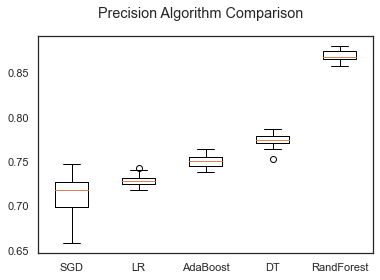

In [49]:
# prepare configuration for cross validation procedure
seed = 1
# algorithms list for further assessment
algos = []
algos.append(('SGD', SGDClassifier()))
algos.append(('LR', LogisticRegression()))
algos.append(('AdaBoost', AdaBoostClassifier()))
algos.append(('DT', DecisionTreeClassifier()))
algos.append(('RandForest', RandomForestClassifier()))


# evaluate each model in turn
results = []
names = []
scoring = 'precision'
for name, algo in algos:
    # define the pipeline
    steps = list()
    # scaling at the implementation of the assessment using Repeated Stratified K-fold CV to avoid data leakage 
    steps.append(('scaler', MinMaxScaler())) # No assumption was made on the distributions of the feature set
    steps.append((name, algo))
    pipeline = Pipeline(steps=steps)
    kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=seed)
    cv_results = cross_val_score(pipeline, final[selected_features], final['IsCanceled'],\
                                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Precision Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

SGD: 0.655870 (0.062582)
LR: 0.664031 (0.008900)
AdaBoost: 0.714506 (0.007293)
DT: 0.786582 (0.006695)
RandForest: 0.774428 (0.007719)


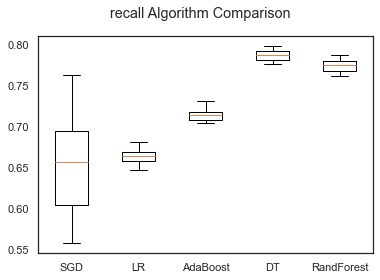

In [50]:
# prepare configuration for cross validation procedure
seed = 1
# algorithms list for further assessment
algos = []
algos.append(('SGD', SGDClassifier()))
algos.append(('LR', LogisticRegression()))
algos.append(('AdaBoost', AdaBoostClassifier()))
algos.append(('DT', DecisionTreeClassifier()))
algos.append(('RandForest', RandomForestClassifier()))


# evaluate each model in turn
results = []
names = []
scoring = 'recall'
for name, algo in algos:
    # define the pipeline
    steps = list()
    # scaling at the implementation of the assessment using Repeated Stratified K-fold CV to avoid data leakage 
    steps.append(('scaler', MinMaxScaler())) # No assumption was made on the distributions of the feature set
    steps.append((name, algo))
    pipeline = Pipeline(steps=steps)
    kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=seed)
    cv_results = cross_val_score(pipeline, final[selected_features], final['IsCanceled'],\
                                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('recall Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Analysis of the algos results for precision and recall

We will proceed to check for best implementation using GridSearchCV for both Decision Trees and Random Forests, a more interpretable one and a less interpretable one. Random Forests presented the best performance for precision by large margin with the lowest stardard deviation and regarding recall it presented also good numbers be the second largest. Furthermore, Decision Trees were also selected since it presented a precision very close to its rival in the white box spectrum of models (Logistic Regression) and regarding recall it presented a highest value (~.81) in the "vanilla" specification.

They overall seem to be the best one to proceed on this more exaustive next step on selecting the correct model. Furthermore, Decision Trees help us on Feature Selection process since we can easily define the most important features for the best implementation, trim the feature set and reassess if the performance stays close to the metrics we found on a more broad feature set. 

### GridSearchCV results analysis

Unfortunately, since we want at least 68% of recall and contigent on that measure maximize precision it is very difficult to only use this library and go with the specification it defines as the best for a specific metric. 

By selecting a specification maximizing precision, it generates a precision that is extremely low for both algorithms we are testing and this leads to problems such as not having the 68% recall minimum we decided its the necessary level of recall for the predictive model. Therefore, since F1-Score is a more balanced measure between recall and precision (harmonic mean) we will find the best specification for both algorithms using this measure and from that specification adjust the arguments in order to generate results that will more or less converge to the specification we desire, as follows:

$$ \textrm{Max     } {Precision}_{1} \textrm{     subject  to     } {Recall}_{1}  >=  {0.68} \textrm{     and     } {Precision}_{1}  >=  {0.79} $$

This results guarantees that we meet the Michael's desire to lower cancellation rate by 50% with a good margin to keep the model in production and have time to monitor its degradation and also gurantees a trustworthy policy of overbooking with high confidence that overbooked customers appearing in the lobby without a room to stay may occur.

In [51]:
# Define the RandomForestClassifier
model = RandomForestClassifier()

# Define the grid to explore
grid = {
    "criterion": ["entropy", "gini"],
    "n_estimators": [25, 50, 100],
    "max_depth": [None, 4, 6, 9, 12],
    "min_samples_split": [None, 4, 8, 16],
    "max_features": [None, "sqrt", "log2"],
    }

# Instatiating GridSearch
splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
gscv = GridSearchCV(model, grid, cv=splitter, scoring='f1', refit=True, verbose=-1, n_jobs=-1)

In [52]:
# Grid Search and model training
gscv.fit(final[selected_features], final['IsCanceled'])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 28.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 4, 6, 9, 12],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_split': [None, 4, 8, 16],
                         'n_estimators': [25, 50, 100]},
             scoring='f1', verbose=-1)

In [53]:
# Saving best model
best_rf = gscv.best_estimator_
print("\nThe hyper-parameters selected are:\n", gscv.best_params_)


The hyper-parameters selected are:
 {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_split': 4, 'n_estimators': 100}


In [54]:
# Define the DecisionTreeClassifier
model_dt = DecisionTreeClassifier()

# Define the grid to explore
grid_dt = {
    "criterion": ["entropy", "gini"],
    "max_depth": [6, 8, 10, 12],
    "min_samples_split": [6, 9, 12, 15],
    "max_features": [None, "sqrt", "log2"],
    }

# Instatiating GridSearch
splitter_dt = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
gscv_dt = GridSearchCV(model_dt, grid_dt, cv=splitter_dt, scoring='f1', refit=True, verbose=-1, n_jobs=-1)

In [55]:
# Grid Search and model training
gscv_dt.fit(final[selected_features], final['IsCanceled'])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   17.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [6, 8, 10, 12],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_split': [6, 9, 12, 15]},
             scoring='f1', verbose=-1)

In [56]:
# Saving best model
best_dt = gscv_dt.best_estimator_
print("\nThe hyper-parameters selected are:\n", gscv_dt.best_params_)


The hyper-parameters selected are:
 {'criterion': 'gini', 'max_depth': 12, 'max_features': None, 'min_samples_split': 12}


### Changing arguments and finding the best specification

Since we are trying to maximize this problem: $$ \textrm{Max     } {Precision}_{1} \textrm{     subject  to     } {Recall}_{1}  >=  {0.6} $$ The focus is to change some arguments on the benchmark that maximizes the harmomnic mean between recall and precision to find a specification with high precision and at least 0.60 recall. 

By having this implementation, we are confident that a overbooking policy can be deployed for most of the predicted booking cancellation and also provide a probable number of missed cancellations that the hotel must act upon generating discounts and upgrades for every other customer that checks-in in order to maximize profits. 

#### Testing the GridSearch arguments that maximizes F1 (benchmark)

DT_GSCV: 0.783288 (0.006837)
RF_GSCV: 0.867508 (0.005340)


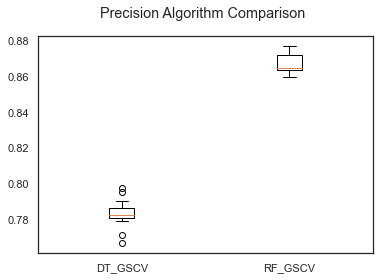

In [57]:
# prepare configuration for cross validation procedure 
seed = 1

# model preparation
algos = []
algos.append(('DT_GSCV', DecisionTreeClassifier(random_state = 1, criterion='gini', max_depth=12, max_features= None, min_samples_split= 12)))
algos.append(('RF_GSCV', RandomForestClassifier(criterion='entropy', random_state=1, max_depth=None, max_features=None, min_samples_split=4, n_estimators=100)))

# evaluate each model in turn
results = []
names = []
scoring = 'precision'

for name, algo in algos:
    # define the pipeline
    steps = list()
    #scaling at the implementation of the assessment using K-fold CV to avoid data leakage 
    steps.append(('scaler', MinMaxScaler())) # No assumption was made on the distributions of the feature set
    steps.append((name, algo))
    pipeline = Pipeline(steps=steps)
    kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=seed)
    cv_results = cross_val_score(pipeline, final[selected_features], final['IsCanceled'], cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle(' Precision Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

DT_GSCV: 0.743258 (0.009960)
RF_GSCV: 0.794624 (0.007083)


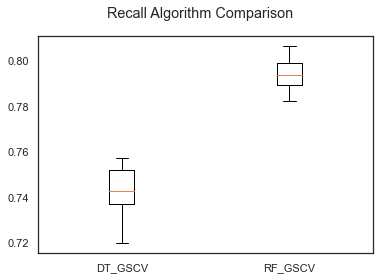

In [58]:
# prepare configuration for cross validation procedure 
seed = 1

# model preparation
algos = []
algos.append(('DT_GSCV', DecisionTreeClassifier(random_state = 1, criterion='gini', max_depth=12, max_features= None, min_samples_split= 12)))
algos.append(('RF_GSCV', RandomForestClassifier(criterion='entropy', random_state=1, max_depth=None, max_features=None, min_samples_split=4, n_estimators=100)))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, algo in algos:
    # define the pipeline
    steps = list()
    #scaling at the implementation of the assessment using K-fold CV to avoid data leakage 
    steps.append(('scaler', MinMaxScaler())) # No assumption was made on the distributions of the feature set
    steps.append((name, algo))
    pipeline = Pipeline(steps=steps)
    kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=seed)
    cv_results = cross_val_score(pipeline, final[selected_features], final['IsCanceled'], cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Recall Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##### Overall, we played with different arguments and the ones that more or less optimize the problem we defined was playing with the class_weight and max_depth

DT_GSCV_Alternative: 0.840764 (0.006230)
RF_GSCV_Alternative: 0.875045 (0.004294)


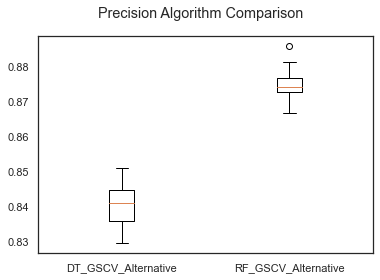

In [86]:
# prepare configuration for cross validation 
seed = 1

# model preparation
algos = []
algos.append(('DT_GSCV_Alternative', DecisionTreeClassifier(random_state = 1, max_depth = 12, class_weight = {0:8, 1:4},\
                              splitter = 'best', criterion = 'entropy')))
algos.append(('RF_GSCV_Alternative', RandomForestClassifier(class_weight = {0:20, 1:2}, criterion='entropy', random_state=1, max_depth=None, max_features=None, min_samples_split=4, n_estimators=100)))

# evaluate each model in turn
results = []
names = []
scoring = 'precision'

for name, algo in algos:
    # define the pipeline
    steps = list()
    #scaling at the implementation of the assessment using K-fold CV to avoid data leakage 
    steps.append(('scaler', MinMaxScaler())) # No assumption was made on the distributions of the feature set
    steps.append((name, algo))
    pipeline = Pipeline(steps=steps)
    kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=seed)
    cv_results = cross_val_score(pipeline, final[selected_features], final['IsCanceled'], cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Precision Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

DT_GSCV_Alternative: 0.621659 (0.027066)
RF_GSCV_Alternative: 0.774066 (0.005754)


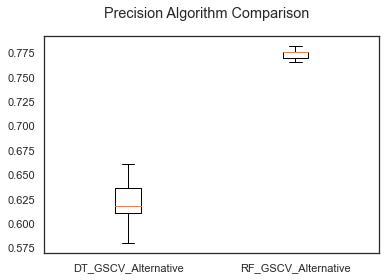

In [85]:
# prepare configuration for cross validation 
seed = 1

# model preparation
algos = []
algos.append(('DT_GSCV_Alternative', DecisionTreeClassifier(random_state = 1, max_depth = 12, class_weight = {0:8, 1:4},\
                              splitter = 'best', criterion = 'entropy')))
algos.append(('RF_GSCV_Alternative', RandomForestClassifier(class_weight = {0:20, 1:2}, criterion='entropy', random_state=1, max_depth=None, max_features=None, min_samples_split=4, n_estimators=100)))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, algo in algos:
    # define the pipeline
    steps = list()
    #scaling at the implementation of the assessment using K-fold CV to avoid data leakage 
    steps.append(('scaler', MinMaxScaler())) # No assumption was made on the distributions of the feature set
    steps.append((name, algo))
    pipeline = Pipeline(steps=steps)
    kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=seed)
    cv_results = cross_val_score(pipeline, final[selected_features], final['IsCanceled'], cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Precision Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Algorithm Selection

We selected the RF_GSCV_Alternative which corresponds to the following model:

    RandomForestClassifier(class_weight = {0:20, 1:2},\
    criterion='entropy',\
    random_state=1,\
    max_depth=None,\
    max_features=None,\
    min_samples_split=4,\
    n_estimators=100)

##### There was a few reasons that made us select the RandomForestClassifier over DecisionTreeClassifier:
##### (I): +.035 precision difference over DT with a standard deviation of 0.0043, which is ~69% of DT contender (less overfitting and more precise);
##### (II): ~+0.15 recall difference with a standard deviation of 0.0058, which is ~22% of DT contender (less overfitting and more sensitive);

Despite having less explainability and being more computationally daunting we will proceed with the Random Forest Classifier at the above specification.

Also, is important to note that Random Forest Trees are nonparametric and scale invariant, which means that no assumptions are made about the multivariate distribution of the data and features with different scales don't generate an issue for an predictive model implementation.

### Feature importance assessment 

We can assess the feature set in order to lower the number of features used in the predictive model to lower computational costs of the production of it. Additionally, it is important to assess if the predictive power of the model with less features is not that hampered by trimming the feature set. 

In [87]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    final[selected_features],
    final['IsCanceled'],
    stratify=final['IsCanceled'],
    test_size=0.2,
    random_state=0)

In [88]:
# Apply the best parametres to RandomForestClassifier
all_feat_rf = RandomForestClassifier(class_weight = {0:20, 1:2}, criterion='entropy', random_state=1, max_depth=None, max_features=None, min_samples_split=4, n_estimators=100)

all_feat_rf.fit (X_train, y_train)

RandomForestClassifier(class_weight={0: 20, 1: 2}, criterion='entropy',
                       max_features=None, min_samples_split=4, random_state=1)

In [89]:
# Get test set y_pred and evaluate on precision
y_test_pred = all_feat_rf.predict(X_test)

In [90]:
# Test set classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      9240
           1       0.88      0.77      0.82      6615

    accuracy                           0.86     15855
   macro avg       0.86      0.85      0.85     15855
weighted avg       0.86      0.86      0.86     15855



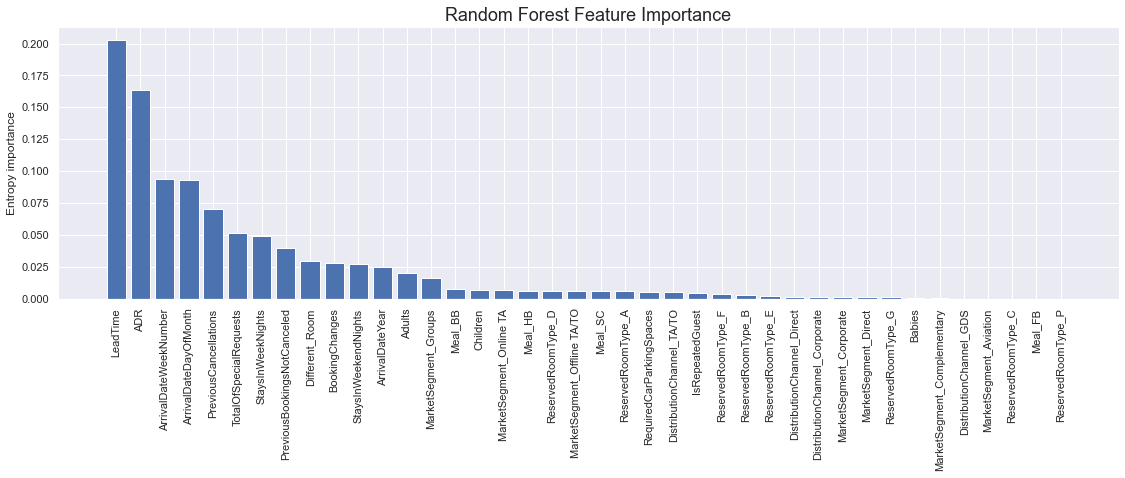

In [92]:
# Decision Tree Feature Importance plot
sns.set()

# data
feature_names = final[selected_features].columns
feature_importances = pd.Series(all_feat_rf.feature_importances_, index=feature_names).\
    sort_values(ascending=False)

# figure
fig = plt.figure(figsize=(19,5))

# axis
plt.bar(x=feature_importances.index, height=feature_importances.values)

# properties
plt.ylabel("Entropy importance")  # The importance of a feature is computed as the (normalized) total reduction of the 
                               # criterion brought by that feature. It is also known as the Gini importance.
plt.xticks(rotation=90)
plt.title("Random Forest Feature Importance", fontsize=18)

plt.show()

In [93]:
# Checking which features are more important for the model
feature_importances.round(3)

LeadTime                         0.203
ADR                              0.164
ArrivalDateWeekNumber            0.094
ArrivalDateDayOfMonth            0.093
PreviousCancellations            0.071
TotalOfSpecialRequests           0.052
StaysInWeekNights                0.049
PreviousBookingsNotCanceled      0.040
Different_Room                   0.030
BookingChanges                   0.028
StaysInWeekendNights             0.028
ArrivalDateYear                  0.025
Adults                           0.020
MarketSegment_Groups             0.016
Meal_BB                          0.008
Children                         0.007
MarketSegment_Online TA          0.007
Meal_HB                          0.006
ReservedRoomType_D               0.006
MarketSegment_Offline TA/TO      0.006
Meal_SC                          0.006
ReservedRoomType_A               0.006
RequiredCarParkingSpaces         0.006
DistributionChannel_TA/TO        0.005
IsRepeatedGuest                  0.005
ReservedRoomType_F       

In [94]:
# Selected features to create the final model
feature_importances.round(3).head(14)

LeadTime                       0.203
ADR                            0.164
ArrivalDateWeekNumber          0.094
ArrivalDateDayOfMonth          0.093
PreviousCancellations          0.071
TotalOfSpecialRequests         0.052
StaysInWeekNights              0.049
PreviousBookingsNotCanceled    0.040
Different_Room                 0.030
BookingChanges                 0.028
StaysInWeekendNights           0.028
ArrivalDateYear                0.025
Adults                         0.020
MarketSegment_Groups           0.016
dtype: float64

In [95]:
# We have 14 features for the trimmed feature set implementation of the best algorithm
final_variables=['LeadTime',
'ADR',
'ArrivalDateWeekNumber',
'ArrivalDateDayOfMonth',
'PreviousCancellations',
'TotalOfSpecialRequests',
'StaysInWeekNights',
'PreviousBookingsNotCanceled',
'Different_Room',
'BookingChanges',
'StaysInWeekendNights',
'ArrivalDateYear',
'Adults',
'MarketSegment_Groups']

In [96]:
# Number of features trimmed from the feature set
-len(final_variables)+len(selected_features)

26

### Let's assess Precision and Recall for the trimmed feature set

In [97]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    final[final_variables],
    final['IsCanceled'],
    stratify=final['IsCanceled'],
    test_size=0.2,
    random_state=0)

In [99]:
# define the pipeline
steps = list()
steps.append(('scaler', MinMaxScaler()))
steps.append(('RF_GSCV_Alternative', RandomForestClassifier(class_weight = {0:20, 1:2}, criterion='entropy', random_state=1, max_depth=None, max_features=None, min_samples_split=4, n_estimators=100)))
pipeline = Pipeline(steps=steps)

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

# evaluate the model using cross-validation
scores = cross_val_score(pipeline, final[selected_features], final['IsCanceled'], scoring='recall', cv=cv, n_jobs=4)

# report performance
print('Recall: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))

Recall: 77.688 (0.631)


In [100]:
# define the pipeline
steps = list()
steps.append(('scaler', MinMaxScaler()))
steps.append(('DT_GSCV_Alternative', RandomForestClassifier(class_weight = {0:20, 1:2}, criterion='entropy', random_state=1, max_depth=None, max_features=None, min_samples_split=4, n_estimators=100)))
pipeline = Pipeline(steps=steps)

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

# evaluate the model using cross-validation
scores = cross_val_score(pipeline, final[selected_features], final['IsCanceled'], scoring='precision', cv=cv, n_jobs=4)

# report performance
print('Precision: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))

Precision: 87.504 (0.429)


#### Values for a Repeated 10-fold Cross-Validated assessment of the trimmed feature set with best algorithm specification generated almost indistinguishable values for both precision and recall and their corresponding standard deviations. 

We will proceed to suggest overbooking policies and discount pricing policies using this combination of feature set and algorithm specification since it will be less costly to put in production since the feature set lowered by 26 features, finishing with a model with 14 features to be implemented 

In [101]:
# Apply the best parametres to RandomForestClassifier
trim_feat_rf = RandomForestClassifier(class_weight = {0:20, 1:2}, criterion='entropy', random_state=1, max_depth=None, max_features=None, min_samples_split=4, n_estimators=100)
trim_feat_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 20, 1: 2}, criterion='entropy',
                       max_features=None, min_samples_split=4, random_state=1)

In [102]:
# Get test set y_pred and evaluate on precision
y_test_pred = trim_feat_rf.predict(X_test)

In [103]:
# Test set classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      9240
           1       0.87      0.76      0.81      6615

    accuracy                           0.85     15855
   macro avg       0.86      0.84      0.85     15855
weighted avg       0.86      0.85      0.85     15855



In [104]:
# Test set confusion matrix
pd.DataFrame(data=confusion_matrix(y_test, y_test_pred), 
             index=pd.Index(y_train.unique(), name="Ground Truth"), 
             columns=pd.Index(y_train.unique(), name="Predicted"))

Predicted,0,1
Ground Truth,,
0,8506,734
1,1581,5034


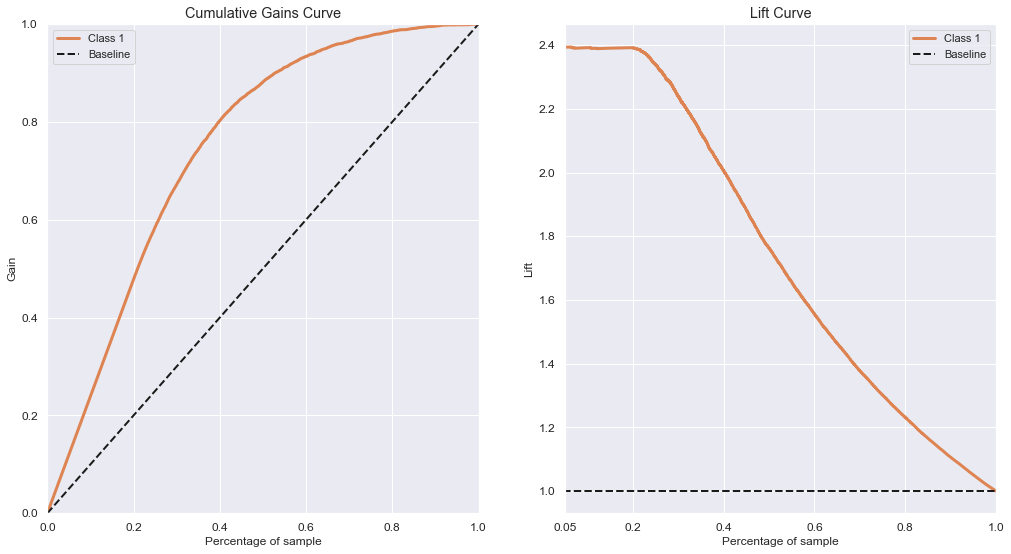

In [105]:
# Plot lift curves
predicted_probas = trim_feat_rf.predict_proba(X_test)

# figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 9))
plot_cumulative_gain(y_test, predicted_probas, ax=ax1)
plot_lift_curve(y_test, predicted_probas, ax=ax2)  # Lift is a measure of the effectiveness of a predictive model
                                                   # calculated as the ratio between the results obtained with and 
                                                   # without the predictive model.
# properties
ax2.set_xlim(0.05, 1)
ax2.set_xticks([0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.set_xticklabels([0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
for ax in (ax1, ax2):
    ax.axes.lines[0].remove()
    ax.get_legend().remove()
    ax.legend()

plt.show()

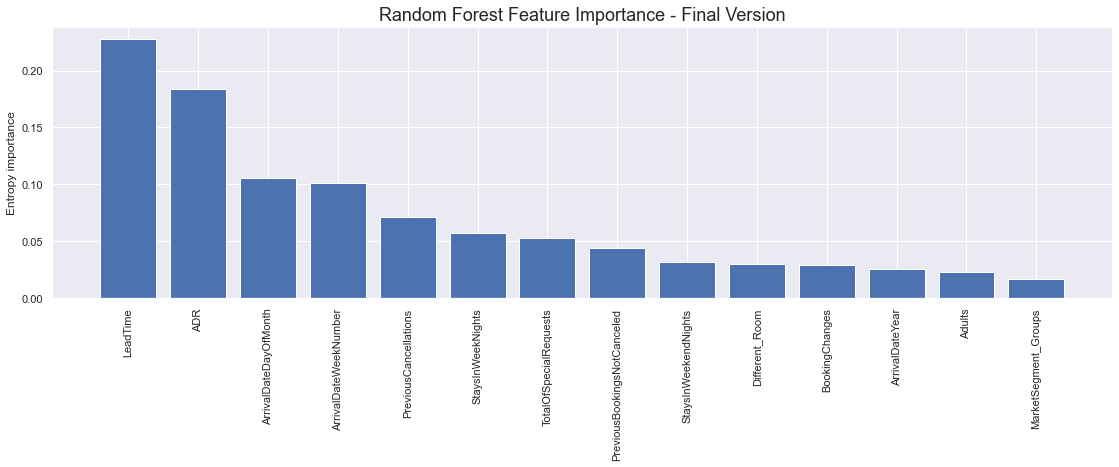

In [106]:
# Decision Tree Feature Importance plot
sns.set()

# data
feature_names = final[final_variables].columns
feature_importances = pd.Series(trim_feat_rf.feature_importances_, index=feature_names).\
    sort_values(ascending=False)

# figure
fig = plt.figure(figsize=(19,5))

# axis
plt.bar(x=feature_importances.index, height=feature_importances.values)

# properties
plt.ylabel("Entropy importance")  # The importance of a feature is computed as the (normalized) total reduction of the 
                               # criterion brought by that feature. It is also known as the Gini importance.
plt.xticks(rotation=90)
plt.title("Random Forest Feature Importance - Final Version", fontsize=18)

plt.show()

## Estimating how much Revenue Loss could be avoided using this predictive algorithm 

In [107]:
y_pred_all = trim_feat_rf.predict(final[final_variables])

In [108]:
confusion_matrix(final['IsCanceled'], y_pred_all)

array([[45454,   744],
       [ 2906, 30170]], dtype=int64)

In [109]:
pd.DataFrame(data=confusion_matrix(final['IsCanceled'], y_pred_all), 
             index=pd.Index(final['IsCanceled'].unique(), name="Ground Truth"), 
             columns=pd.Index(final['IsCanceled'].unique(), name="Predicted"))

Predicted,0,1
Ground Truth,,
0,45454,744
1,2906,30170


In [112]:
final['pred_all']=y_pred_all

In [156]:
final.groupby(['pred_all']).mean()[abs(final.groupby(['pred_all']).mean()[final_variables].pct_change()).iloc[1,:].sort_values(ascending=False).index]

,PreviousCancellations,MarketSegment_Groups,LeadTime,Different_Room,PreviousBookingsNotCanceled,BookingChanges,TotalOfSpecialRequests,StaysInWeekNights,Adults,StaysInWeekendNights,ArrivalDateDayOfMonth,ArrivalDateWeekNumber,ADR,ArrivalDateYear
pred_all,,,,,,,,,,,,,,
0,0.020988,0.103309,80.191046,0.143238,0.207361,0.259140,0.738255,2.117163,1.827647,0.801489,15.809739,27.129797,105.360662,2016.170864
1,0.171540,0.290322,155.921362,0.008572,0.015301,0.072427,0.247299,2.283690,1.887753,0.784984,15.740959,27.234974,105.099693,2016.179530


In [122]:
revenue_gby = final.groupby(['pred_all']).describe()[final_variables]
revenue_gby

LeadTime                                                          \
            count        mean         std  min   25%    50%    75%    max   
pred_all                                                                    
0         48360.0   80.191046   89.145032  0.0  12.0   49.0  120.0  518.0   
1         30914.0  155.921362  125.074712  0.0  55.0  124.0  240.0  629.0   

              ADR              ... Adults      MarketSegment_Groups            \
            count        mean  ...    75%  max                count      mean   
pred_all                       ...                                              
0         48360.0  105.360662  ...    2.0  4.0              48360.0  0.103309   
1         30914.0  105.099693  ...    2.0  4.0              30914.0  0.290322   

                                             
               std  min  25%  50%  75%  max  
pred_all                                     
0         0.304365  0.0  0.0  0.0  0.0  1.0  
1         0.453918  0.0  0.0  0.0  1.0  1.0  

[2 rows x 112 columns]

In [135]:
revenue_gby.loc[:,['StaysInWeekendNights', 'StaysInWeekNights']]

StaysInWeekNights                                                \
                     count      mean       std  min  25%  50%  75%   max   
pred_all                                                                   
0                  48360.0  2.117163  1.392985  0.0  1.0  2.0  3.0  41.0   
1                  30914.0  2.283690  1.543030  0.0  1.0  2.0  3.0  24.0   

         StaysInWeekendNights                                                
                        count      mean       std  min  25%  50%  75%   max  
pred_all                                                                     
0                     48360.0  0.801489  0.861105  0.0  0.0  1.0  2.0  16.0  
1                     30914.0  0.784984  0.920897  0.0  0.0  1.0  1.0  10.0

In [139]:
revenue_gby.loc[:,['ADR']]

ADR                                                        
            count        mean        std  min    25%    50%    75%    max
pred_all                                                                 
0         48360.0  105.360662  40.400817  0.0  80.00   99.1  126.0  510.0
1         30914.0  105.099693  37.643153  0.0  77.23  100.0  126.0  510.0

Precision for Predicted Cancellations (degraded value) * Amount of  Predicted cancellations * ADR on average for Predicted Not Cancellations * Amount of Nights Spent on average for Predicted Not Cancellations 

In [236]:
# Amount of Money it could have earned through overbooking policies
overbooking_profits = (0.8)*\ # recommended overbooking policy, 4 customers every 5 predicted cancelled bookings
      revenue_gby.loc[:,['ADR']].iloc[0,1]*\ # number of predicted cancelled bookings
      revenue_gby.loc[:,['ADR']].iloc[0,1]*\ # mean of spending of those that are not cancelling, because we are trying their consumption not of those that will cancel
      (revenue_gby.loc[:,['StaysInWeekendNights', 'StaysInWeekNights']].iloc[0,1]+\ # number of weekdays that non-cancellations consume
      revenue_gby.loc[:,['StaysInWeekendNights', 'StaysInWeekNights']].iloc[0,9]) # number of weekend days that non-cancellations consume
overbooking_profits

7605118.102109531

In [239]:
# Percent increase in True Revenues due to overbooking policy
overbooking_profits/(252794706-109885060)*100

5.321626856531106